In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time
import talib
from talib import abstract
#from google.colab import files

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data/data1.csv')
df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date','Time'])
df.columns = ['open', 'high', 'low', 'close', 'volume']

In [4]:
df3 = pd.read_csv('data/data2.csv')
df3.index = pd.to_datetime(df3['Date'] + ' ' + df3['Time'])
df3 = df3.drop(columns=['Date','Time'])
df3.columns = ['open', 'high', 'low', 'close', 'volume']
df3.head()

,open,high,low,close,volume
2011-01-03 08:46:00,9000,9008,8995,9006,1340
2011-01-03 08:47:00,9004,9006,9002,9003,336
2011-01-03 08:48:00,9003,9009,9003,9009,514
2011-01-03 08:49:00,9009,9010,9005,9008,465
2011-01-03 08:50:00,9008,9015,9008,9015,672


In [5]:
df2 = df.loc['2010-01-04 08:46:00':'2010-12-31 13:45:00']
df4 = df3.loc['2011-01-03 08:46:00':'2019-12-31 23:59:00']

In [6]:
df5 = pd.read_csv('data/TXF_樣本外.csv')
df5.index = pd.to_datetime(df5['Date'] + ' ' + df5['Time'])
df5 = df5.drop(columns=['Date','Time'])
df5.columns = ['open', 'high', 'low', 'close', 'volume']
df5.head()

,open,high,low,close,volume
2020-01-01 00:00:00,11997,11997,11994,11994,37
2020-01-01 00:01:00,11994,11997,11994,11997,20
2020-01-01 00:02:00,11998,11999,11998,11999,31
2020-01-01 00:03:00,11999,11999,11998,11998,27
2020-01-01 00:04:00,11998,11998,11997,11997,18


In [7]:
df6 = pd.concat([df2,df4,df5], axis=0)
df6.tail()

,open,high,low,close,volume
2023-06-30 23:55:00,16874,16874,16872,16873,42
2023-06-30 23:56:00,16873,16874,16873,16874,13
2023-06-30 23:57:00,16873,16877,16873,16877,69
2023-06-30 23:58:00,16877,16881,16877,16881,52
2023-06-30 23:59:00,16882,16882,16878,16878,41


In [8]:
#df = pd.read_csv('TWF_Futures_Minute_Trade.txt')
#df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'])
#df = df.drop(columns=['Date','Time'])
#df.columns = ['open', 'high', 'low', 'close', 'volume']
df6['Hour'] = df6.index.map(lambda x: x.hour)
df_day = df6[(df6['Hour'] >= 8) & (df6['Hour'] <= 13)]
df_day.index = df_day.index - dt.timedelta(hours=8)
d1 = df_day.resample(rule='1D', closed='right', label='left').first()[['open']]
d2 = df_day.resample(rule='1D', closed='right', label='left').max()[['high']]
d3 = df_day.resample(rule='1D', closed='right', label='left').min()[['low']]
d4 = df_day.resample(rule='1D', closed='right', label='left').last()[['close']]
d5 = df_day.resample(rule='1D', closed='right', label='left').sum()[['volume']]

df_day = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_day = df_day.dropna()
#df_day.index = df_day.index + dt.timedelta(days=1) ##回測時結算日也要加一天
print(len(df_day))

3313


In [8]:
'''cci = pd.read_csv('Consumer confidence.csv')
cci_in_sample = cci.iloc[:84]
cci_in_sample.tail()'''

'''cci_in_sample = cci_in_sample.rename(columns={"Date": "date"," Value": "cci"})
cci_in_sample["date"] = pd.to_datetime(cci_in_sample["date"])'''

'''h = cci_in_sample["cci"].mean() + cci_in_sample["cci"].std()
m = cci_in_sample["cci"].mean()
l = cci_in_sample["cci"].mean() - cci_in_sample["cci"].std()
cci_in_sample['id'] = cci_in_sample.date.map(lambda x: x.year*100 + x.month)
cci_in_sample.head()'''

'''cci_in_sample["id"] = cci_in_sample["id"].shift(-1)
df_day['id'] = df_day.index.map(lambda x: x.year*100 + x.month)'''

'''df_day_1 = df_day.join(cci_in_sample.set_index('id'), on='id',lsuffix='_l', rsuffix='_r')'''

"df_day_1 = df_day.join(cci_in_sample.set_index('id'), on='id',lsuffix='_l', rsuffix='_r')"

In [9]:
df_day_1 = df_day.copy()
df_day_1["sar"] = abstract.SAR(df_day_1,0.005,0.2)
df_day_1["ema10"] = abstract.EMA(df_day_1, timeperiod=10)
df_day_1["ema60"] = abstract.EMA(df_day_1, timeperiod=60)
df_day_1["adx"] = abstract.ADX(df_day_1,14)
df_day_1["ema5"] = abstract.EMA(df_day_1, timeperiod=5)
df_day_1 = df_day_1.dropna()

In [10]:
df_day_1.head()

,open,high,low,close,volume,sar,ema10,ema60,adx,ema5
2010-04-06,8071.0,8142.0,8062.0,8096.0,86604,7487.293986,7951.870093,7800.966667,13.752533,8016.027548
2010-04-07,8125.0,8140.0,8095.0,8126.0,61074,7526.576347,7983.530076,7811.623497,14.595755,8052.685032
2010-04-08,8110.0,8170.0,8045.0,8081.0,127009,7563.501766,8001.251881,7820.455514,14.760697,8062.123355
2010-04-09,8077.0,8105.0,8046.0,8101.0,71116,7602.924151,8019.387902,7829.653694,14.913858,8075.082236
2010-04-12,8158.0,8168.0,8086.0,8126.0,79344,7639.784081,8038.771920,7839.369966,15.599109,8092.054824


In [11]:
settlementDate_ = pd.read_csv('data/settlementDate.csv')#, encoding = 'ANSI')
settlementDate_.columns = ['settlementDate', 'futures', 'settlementPrice']
bool_ = [False if 'W' in i else True for i in settlementDate_['futures']]
settlementDate = [i.replace('/','-') for i in list(settlementDate_[bool_]['settlementDate'])]
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]

In [12]:
df_day_1['market'] = (df_day_1['close']-df_day_1['close'].shift(1))*200

C:\Users\USER\miniconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_day_1.head()

,open,high,low,close,volume,sar,ema10,ema60,adx,ema5,market
2010-04-06,8071.0,8142.0,8062.0,8096.0,86604,7487.293986,7951.870093,7800.966667,13.752533,8016.027548,NaN
2010-04-07,8125.0,8140.0,8095.0,8126.0,61074,7526.576347,7983.530076,7811.623497,14.595755,8052.685032,6000.0
2010-04-08,8110.0,8170.0,8045.0,8081.0,127009,7563.501766,8001.251881,7820.455514,14.760697,8062.123355,-9000.0
2010-04-09,8077.0,8105.0,8046.0,8101.0,71116,7602.924151,8019.387902,7829.653694,14.913858,8075.082236,4000.0
2010-04-12,8158.0,8168.0,8086.0,8126.0,79344,7639.784081,8038.771920,7839.369966,15.599109,8092.054824,5000.0


In [17]:
df_arr = np.array(df_day_1)
time_arr = np.array(df_day_1.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

### 做多加碼

Buy Price: 8753.0, time: 2011-01-10T00:00:00.000000000

add position at 2011-01-13T00:00:00.000000000, 8998.0

Sell Price: 8965.0, time: 2011-01-14T00:00:00.000000000
Trade completed 停損停利

Buy Price: 8993.0, time: 2011-01-17T00:00:00.000000000

Sell Price: 9018.0, time: 2011-01-20T00:00:00.000000000
Trade completed 出場條件

Buy Price: 8814.0, time: 2011-02-21T00:00:00.000000000

Sell Price: 8531.0, time: 2011-03-15T00:00:00.000000000
Trade completed 停損停利

Buy Price: 8640.0, time: 2011-04-01T00:00:00.000000000

add position at 2011-04-07T00:00:00.000000000, 8864.0

Sell Price: 8921.0, time: 2011-04-08T00:00:00.000000000
Trade completed 停損停利

Buy Price: 8077.0, time: 2012-03-20T00:00:00.000000000

Sell Price: 8009.0, time: 2012-03-22T00:00:00.000000000
Trade completed 出場條件

Buy Price: 7362.0, time: 2012-11-26T00:00:00.000000000

add position at 2012-11-28T00:00:00.000000000, 7407.0

add position at 2012-11-30T00:00:00.000000000, 7535.0

Sell Price: 7596.0, time: 2012-12-03T00:00:00.00000000

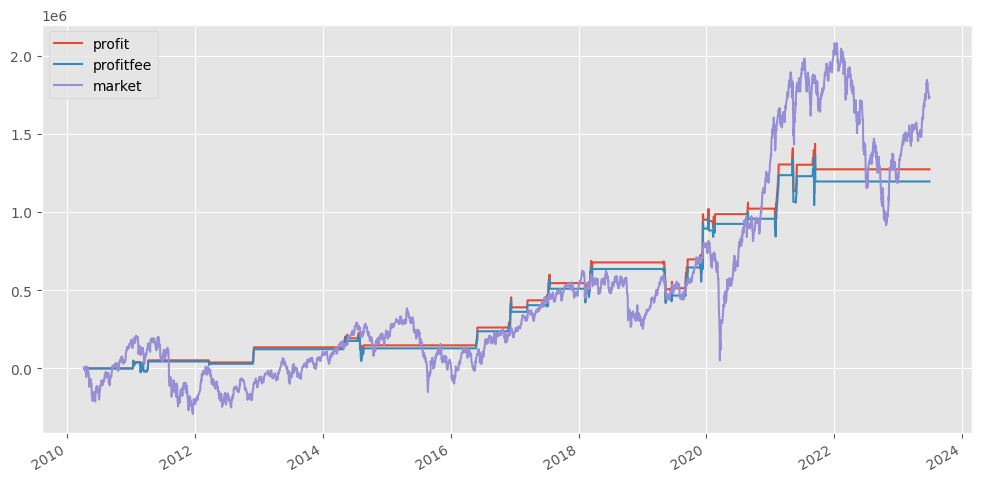

In [18]:
fund = 1000000
feePaid = 600
K = 0.05
BS = None
Position = 0
buy_price = 0
add_price = 0
count= 0
buy = []
sell = []
cost_list = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):

    #回測期間最後一天就跳出這個迴圈
    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    cond1 = df_arr[i,3] < df_arr[i,5]  #收盤價小於sar
    cond2 = df_arr[i,8] > 25            #adx > 25
    cond3 = df_arr[i,3] > df_arr[i,7]  #收盤價 突破60
    entryLong = (cond1 & cond2 &cond3)
    
    #結算日不進場
    entryCondition = date_arr[i] not in settlementDate

    ## 出場邏輯
    cond5 = df_arr[i,3] > df_arr[i,5] 
    cond6 = df_arr[i,8] > 25 
    cond7 = df_arr[i,3] < df_arr[i,6] #收盤價 10日
    exitShort = (cond5 & cond6 & cond7)
    
    
    ### 結算日時放到結算
    exitCondition = date_arr[i] in settlementDate


    ## 停利停損邏輯
    if BS == 'B':
        stopLoss = (df_arr[i, 2] <= df_arr[t,0] * (1-0.05)) and (df_arr[i, 0] < df_arr[i, 9])
        stopProfit = (df_arr[i,1] >= df_arr[t,0] * (1+0.03))  # 避免短時間瞬間崩盤  
        #做多狀態的加碼條件
        add_condition = ((df_arr[i, 0] > buy_price) & (df_arr[i, 0] > df_arr[i, 6]) & (df_arr[i, 0] >add_price))

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if (BS == None) & (Position == 0):
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryLong and entryCondition:
            BS = 'B'
            Position = 1
            t = i+1
            buy_price = df_arr[i+1, 0]
            cost_list.append(buy_price)
            buy.append(t)
            print("Buy Price: {}, time: {}".format(df_arr[t,0], time_arr[t]))
            print()

    elif BS == 'B':

        profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) * Position
        profit_list.append(profit)
        
        if exitShort or i == len(df_arr)-2 or exitCondition:
            if 0 <Position<5 :
                #實現損益
                pl_round = 200*(Position*df_arr[i+1,0] - np.sum(cost_list))
                profit_fee = profit - feePaid*2*Position
                profit_fee_list.append(profit_fee)
                sell.append(i+1)

                # Realized PnL
                profit_fee_realized = pl_round - feePaid*2*Position
                profit_fee_list_realized.append(profit_fee_realized)

                #重置交易狀態
                BS = None
                #重置部位數量
                Position = 0
                #重置加碼參考價
                buy_price = 0
                #重置加碼成本
                add_price = 0
                cost_list = []
                print("Sell Price: {}, time: {}".format(df_arr[i+1,0], time_arr[i+1]))
                print("Trade completed 出場條件")
                print()
        elif stopLoss or stopProfit:
            if 0 < Position < 5 :
                #實現損益
                pl_round = 200*(Position*df_arr[i+1,0] - np.sum(cost_list))
                profit_fee = profit - feePaid*2*Position
                profit_fee_list.append(profit_fee)
                sell.append(i+1)

                # Realized PnL
                profit_fee_realized = pl_round - feePaid*2*Position
                profit_fee_list_realized.append(profit_fee_realized)

                #重置交易狀態
                BS = None
                #重置部位數量
                Position = 0
                #重置加碼參考價
                buy_price = 0
                #重置加碼成本
                add_price = 0
                cost_list = []
                print("Sell Price: {}, time: {}".format(df_arr[i+1,0], time_arr[i+1]))
                print("Trade completed 停損停利")
                print()        
        #確認部位上限&加碼條件成立
        elif add_condition & (Position <= 3) & (Position != 0):
            #更改部位數量
            Position += 1
            count +=1
            add_price = df_arr[i+1, 0]
            cost_list.append(add_price)
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            #print("time: {}, Buy price: {} < Market Price: {}".format(time_arr[i], buy_price, df_arr[i, 0]))
            print("add position at {}, {}".format(time_arr[i+1], df_arr[i+1, 0]))
            print()

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list), 'market':np.cumsum(df_day_1['market'])},index=df_day_1.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6));

In [27]:
np.cumsum(profit_fee_list_realized)

array([  33400.,   37200.,  -20600.,   44600.,   29800.,  123000.,
        176000.,  128600.,  238000.,  362600.,  405000.,  510400.,
        509800.,  637000.,  462400.,  466800.,  646800.,  895800.,
        883600.,  925800.,  958600., 1238000., 1261000., 1066800.,
       1231400., 1197400.])

In [29]:
equity['profitfee'].tail()

2023-06-26    1197400.0
2023-06-27    1197400.0
2023-06-28    1197400.0
2023-06-29    1197400.0
2023-06-30    1197400.0
Name: profitfee, dtype: float64

In [25]:
import seaborn as sns
import matplotlib.pyplot as py
plt.style.use('ggplot')

equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity']/equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax() #前n個元素的最大值
#print(profit_fee_list_realized)
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy) + count
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i>0]) / abs(sum([i for i in profit_fee_list_realized if i<0]))

print('Profit : ',profit)
print('累積Return : ',ret)
print("年化報酬", np.power((ret+1),1/13)-1)
print('Max DrawDown : ',mdd)
print('Caimar Ratio : ',calmarRatio)
print('Trade Times : ',tradeTimes)
print('Win Rate : ',winRate)
print('Profit Factor : ',profitFactor)

Profit :  1197400.0
累積Return :  1.1974
年化報酬 0.06243092010348472
Max DrawDown :  0.14060796899600336
Caimar Ratio :  8.515875796726961
Trade Times :  65
Win Rate :  0.6923076923076923
Profit Factor :  3.2356235997012694


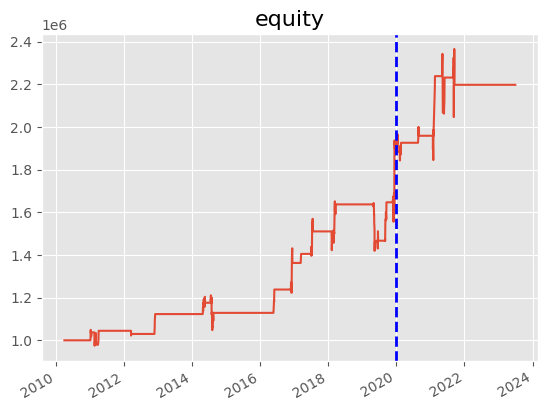

In [17]:
plt.title('equity', fontsize=16)
equity['equity'].plot()
plt.axvline(x="2020-01-01",c="b", ls="--", lw=2)
plt.show()


Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021, 2022, 2023],
           dtype='int64')


C:\Users\USER\miniconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  import sys


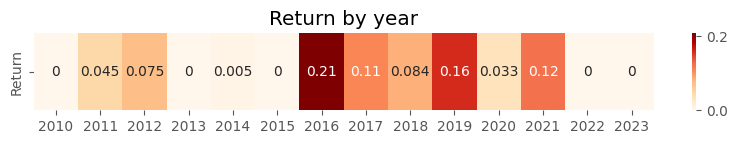

"# 時間損益(月)\ngroup_data = equity.groupby([equity.index.year, equity.index.month])\n\nmonth_ret = []\nfor group, data in group_data:\n    month_ret.append(data['equity'].iloc[-1]/data['equity'].iloc[0] - 1)\n\ndf = pd.DataFrame(np.array(month_ret).reshape((10,12)), columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],\n                    index = years)\n\nprint(df)\npy.figure(figsize=(15,15))\nsns.heatmap(df, annot=True, cmap='OrRd')\npy.title('Return by month')\npy.show()"

In [19]:
# 時間損益(年)
equity.index = pd.to_datetime(equity.index) #確保索引是datetime型態
years = ['2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020','2021','2022','2023']
year_ret = []
print(equity.index.year.unique())
for i in equity.index.year.unique():
    year_ret.append(equity[str(i)]['equity'].iloc[-1]/equity[str(i)]['equity'].iloc[0] - 1)

df = pd.DataFrame({'Return':year_ret},index = years)

# heatmap函式
py.figure(figsize=(10,1))
sns.heatmap(df.transpose(), annot=True, cmap='OrRd')
py.title('Return by year')
py.show()
print('')

# 時間損益(月)
group_data = equity.groupby([equity.index.year, equity.index.month])

month_ret = []
for group, data in group_data:
    month_ret.append(data['equity'].iloc[-1]/data['equity'].iloc[0] - 1)

df = pd.DataFrame(np.array(month_ret).reshape((10,12)), columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = years)

print(df)
py.figure(figsize=(15,15))
sns.heatmap(df, annot=True, cmap='OrRd')
py.title('Return by month')
py.show()

In [ ]:
# 損益分布
print(rets)
sns.histplot(rets, kde=True)
py.xlabel('Return per trade')
py.ylabel('Frequency')
py.title('Profit Loss Distribution')
py.show()

In [ ]:
# quantstats回測報表
import quantstats
ret = equity['equity'].pct_change(periods=1).dropna()
print(ret)
quantstats.reports.full(ret)
#quantstats.reports.html(ret,output='stats.html',title='backtest result',download_filename='result.html')